# Navigation

---

In [1]:
# !pip -q install ./python

In [1]:
%load_ext autoreload

%autoreload 2

from src.agent import Agent
from src.dqn import dqn
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [3]:
agent = Agent(state_size, action_size, seed=7366, td_target_type="Double DQN")

Episode 100	Average Score: 0.06
Episode 200	Average Score: 1.32
Episode 300	Average Score: 5.12
Episode 400	Average Score: 8.61
Episode 500	Average Score: 9.91
Episode 600	Average Score: 12.20
Episode 624	Average Score: 13.02
Environment solved in 524 episodes!	Average Score: 13.02


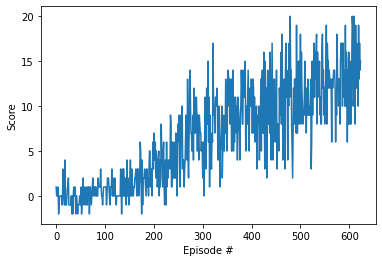

In [4]:
scores = dqn(agent, env, brain_name, n_episodes=1_800)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()